[2025-05-30 Fiddler](https://thefiddler.substack.com/p/can-you-weave-the-web)
====================

Fiddler
-------
First, given a first point, $a$, and a random second point, $b$, consider the
probability that some point, $c$, is on the line between $a$ and $b$.
The probability is proportional to the length of the line between $a$ and $c$
within the square, $L_{ac}$.

Let the corners of the square be at (0,0), (1,0), (1,1) and (0,1).

Let point $a$ be at $(x_a, y_a)$ and point $c$ be at $(x_c, y_c)$.

Consider point $c$ in the 1/8th of the square where $0 > x_c > y_c > 1/2$.
By symmetry, the distribution in the other 7/8ths should be the same with
appropriate combinations of rotation, reflection, and translation.

Point $c$ defines four regions of the square, and we can define $L_{ac}$ when
point $a$ is in each region, as illustrated in the following figure:

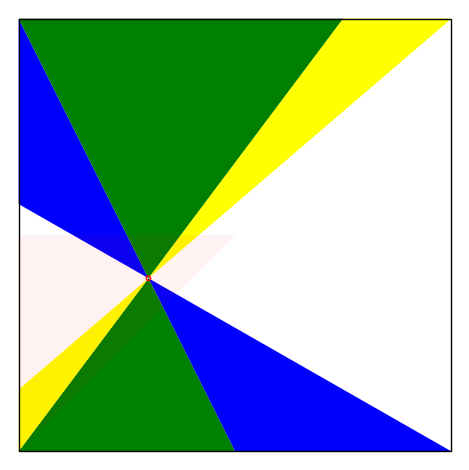

In [1]:
def fig(xp,yp,x0=0,y0=0):
    return (circle((x0+xp,y0+yp),0.005,color='red',axes=False)
            + polygon([(x0+0,y0+1),(x0+0,y0+yp/(1-xp)),(x0+xp,y0+yp)],color='blue')
            + polygon([(x0+1,y0+0),(x0+xp/(1-yp),y0+0),(x0+xp,y0+yp)],color='blue')
            + polygon([(x0+0,y0+1),(x0+xp/yp,y0+1),(x0+xp,y0+yp)],color='green')
            + polygon([(x0+0,y0+0),(x0+xp/(1-yp),y0+0),(x0+xp,y0+yp)],color='green')
            + polygon([(x0+1,y0+1),(x0+xp/yp,y0+1),(x0+xp,y0+yp)],color='yellow')
            + polygon([(x0+0,y0+0),(x0+0,y0+1-(1-yp)/(1-xp)),(x0+xp,y0+yp)],color='yellow')
            + polygon([(x0+0,y0+0),(x0+1,y0+0),(x0+1,y0+1),(x0+0,y0+1)],fill=False,color='black')
            + polygon([(x0+0,y0+0),(x0+1/2,y0+1/2),(x0+0,y0+1/2)],color='red',alpha=0.05)
           )

fig(0.3,0.4)

When point $c$ is at the center of the square, $1 \le L_{ac} \le \sqrt2$, and
the probability density gets the benefit of both diagonals.  The blue and yellow
areas vanish.

As point $c$ moves away from the center, the blue and yellow areas,
with smaller $L_{ac}$, grow.

At the middle of the left edge, the blue and yellow areas are maximized, so
I think the most likely point is the center of the square, and the least
likely points are the midpoints of each side.

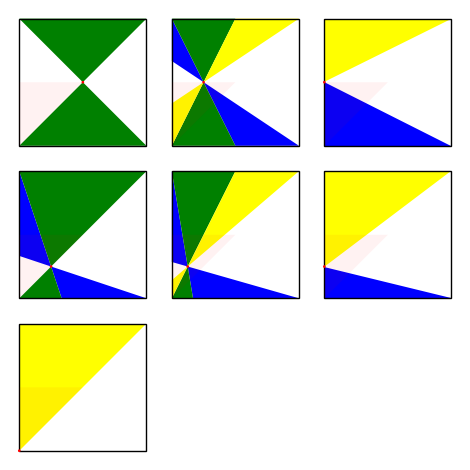

In [7]:
(fig(1/2,1/2)
 +fig(1/4,1/2,x0=1.2)
 +fig(0,1/2,x0=2.4)
 +fig(1/4,1/4,y0=-1.2)
 +fig(1/8,1/4,y0=-1.2,x0=1.2)
 +fig(0,1/4,y0=-1.2,x0=2.4)
 +fig(0,0.001,y0=-2.4)
)

Extra credit
------------
Define the line connecting the point $a$ and point $c$ and where it intersects the
edges of the square

In [3]:
x,y,xa,ya,xc,yc = var("x,y,x_a,y_a,x_c,y_c")
assume(0 < x, x < 1, 0 < y, y < 1, 0 < xa, xa < 1, 0 < ya, ya < 1, 0 < xc, xc < 1, 0 < yc, yc < 1)

line = (x-xa)/(xc-xa) == (y-ya)/(yc-ya)
y0 = solve(line.substitute(x==0),y)[0].rhs()
y1 = solve(line.substitute(x==1),y)[0].rhs()
x0 = solve(line.substitute(y==0),x)[0].rhs()
x1 = solve(line.substitute(y==1),x)[0].rhs()

And $L_{ac}$ in the four regions are

In [4]:
L_b = sqrt(x0^2+y0^2)
L_g = sqrt((x1-x0)^2+1)
L_y = sqrt((1-y0)^2+(1-x1)^2)
L_w = sqrt((y1-y0)^2+1)

The lines bounding the regions are

In [5]:
line00 = line.substitute(xa==0,ya==0)
line01 = line.substitute(xa==0,ya==1)
line10 = line.substitute(xa==1,ya==0)
line11 = line.substitute(xa==1,ya==1)

The probability density is proportional to $\int_0^1 dx_a\int_0^1 dy_a L_{ac}$.
Perhaps I've done something wrong.  It looks like the computer can't handle these integrals:

In [6]:
if False:
    P_b = (
        integral(
            integral(L_b, ya, solve(line10.substitute(x==xa),y)[0].rhs(), solve(line01.substitute(x==xa),y)[0].rhs()),
            xa, 0, xc) +
        integral(
            integral(L_b, xa, solve(line01.substitute(y==ya),x)[0].rhs(), solve(line10.substitute(y==ya),x)[0].rhs()),
            ya, 0, yc) +
        0)
    P_g = (
        integral(
            integral(L_g, xa, solve(line00.substitute(y==ya),x)[0].rhs(), solve(line01.substitute(y==ya),x)[0].rhs()),
            ya, 0, yc) +
        integral(
            integral(L_g, xa, solve(line01.substitute(y==ya),x)[0].rhs(), solve(line00.substitute(y==ya),x)[0].rhs()),
            ya, yc, 1) +
        0)
    P_y = (
        integral(
            integral(L_y, ya, solve(line00.substitute(x==xa),y)[0].rhs(), solve(line11.substitute(x==xa),y)[0].rhs()),
            xa, 0, xc) +
        integral(
            integral(L_y, xa, solve(line00.substitute(y==ya),x)[0].rhs(), solve(line11.substitute(y==ya),x)[0].rhs()),
            ya, yc, 1) +
        0)
    P_w = (
        integral(
            integral(L_w, ya, solve(line11.substitute(x==xa),y)[0].rhs(), solve(line10.substitute(x==xa),y)[0].rhs()),
            xa, 0, xc) +
        integral(
            integral(L_w, ya, solve(line10.substitute(x==xa),y)[0].rhs(), solve(line11.substitute(x==xa),y)[0].rhs()),
            xa, xc, 1) +
        0)
    P = P_b + P_g + P_y + P_w